In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Preprocessing
df = pd.read_csv('movies.csv')
drop_col = ['homepage', 'keywords', 'tagline', 'crew',
            'revenue', 'production_countries', 'budget', 'production_companies']

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.shape

(4803, 24)

In [6]:
df.drop(drop_col, axis=1, inplace=True)
df['release_date'] = df['release_date'].str[:4]
df.dropna(inplace=True)

In [7]:
df.head()

,index,genres,id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,title,vote_average,vote_count,cast,director
0,0,Action Adventure Fantasy Science Fiction,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,Adventure Fantasy Action,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,Action Adventure Crime,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,Action Crime Drama Thriller,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,Action Adventure Science Fiction,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [8]:
df.shape

(4738, 16)

In [9]:
spoken_lan_pattern = r'"iso_639_1": "(\w+)"'
df['spoken_languages'] = df['spoken_languages'].str.extractall(spoken_lan_pattern).groupby(level=0).apply(lambda x: ','.join(x[0]))

In [10]:
bins = [0, 30, 90, 120, float('inf')]
labels = ['Very Short', 'Short', 'Medium', 'Long']
df['runtime_cat'] = pd.cut(df['runtime'], bins=bins, labels=labels)
df.insert(9, 'runtime_cat', df.pop('runtime_cat'))
cutoffs = [0, 4.668070, 12.921594, 28.313505, float('inf')]
popu_labels = ['Very Low', 'Low', 'Medium', 'High']
df['popularity_cat'] = pd.cut(df['popularity'], bins=cutoffs, labels=popu_labels)
df.insert(7, 'popularity_cat', df.pop('popularity_cat'))

In [11]:
ori_lan_cat = []
for i in df['original_language']:
    if i == 'en':
        ori_lan_cat.append(i)
    else:
        ori_lan_cat.append('Others')

se = pd.Series(ori_lan_cat)
df['original_language_cat'] = se.values

In [12]:
# Features
feature = df[['id', 'original_language_cat', 'popularity_cat', 'runtime_cat', 'status', 'vote_average']]
feature['popularity_cat'].fillna(feature['popularity_cat'].mode()[0], inplace=True)
feature['runtime_cat'].fillna(feature['runtime_cat'].mode()[0], inplace=True)

In [13]:
# Encode category features
le = LabelEncoder()

for i in feature.columns[1:-1]:
    feature[i] = le.fit_transform(feature[i])

In [14]:
# Build model
feature_np = feature.to_numpy()
sum_dist = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(feature_np)
    sum_dist.append(k_means.inertia_)

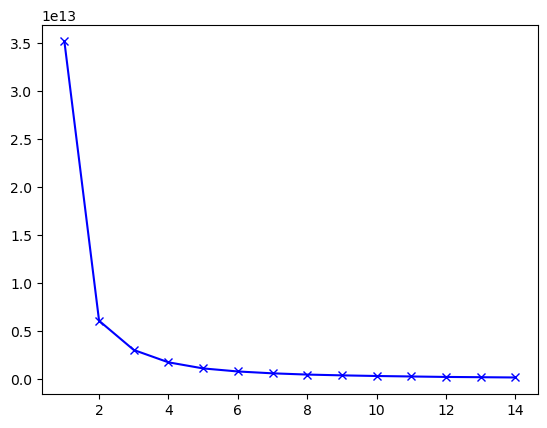

In [15]:
# Run after run for loop above
plt.plot(K, sum_dist, 'bx-')
plt.show()
# Plot show best n_clusters is 5

In [16]:
k_mean_5 = KMeans(n_clusters=5)
model = k_mean_5.fit(feature_np)
result = k_mean_5.labels_
print(silhouette_score(feature_np, result, metric='euclidean'))
print(calinski_harabasz_score(feature_np, result))

0.7008784112818179
37113.79670528804


In [17]:
# Create 2 new dataframe then merge them. Use it to show result
feature_1 = df[['id', 'original_language_cat', 'popularity_cat', 'runtime_cat', 'status', 'vote_average']]
feature_2 = df[['id', 'genres', 'original_language', 'original_title', 'popularity',
                'runtime', 'spoken_languages', 'title', 'vote_count']]
lookup = feature_1.merge(feature_2, on='id', how='left')
lookup['cluster'] = result

In [18]:
# lookup.to_csv('lookup.csv')

In [19]:
def movies_recommend(model, language, popular, runtime, status, vote):
    arr = np.array([language, popular, runtime, status, vote])
    pred = model.predict(arr)
    return lookup[lookup['cluster'] == pred[0]].sample(5)

In [20]:
def movies_recommend(model, language, popular, runtime, status, vote):
    arr = []
    for col, val in zip(['original_language_cat', 'popularity_cat', 'runtime_cat', 'status', 'vote_average'], [language, popular, runtime, status, vote]):
        if val in le.classes_:
            arr.append(le.transform([val])[0])
        else:
            arr.append(-1)
    arr.append(vote)
    arr = np.array(arr).reshape(1, -1)
    pred = model.predict(arr)

    cluster = pred[0]
    mask = lookup['cluster'] == cluster
    return lookup[mask].sample(5)

In [26]:
print(df['original_language_cat'].unique(),df['popularity_cat'].unique(),df['runtime_cat'].unique(),df['status'].unique())

['en' 'Others'] ['High', 'Very Low', 'Medium', 'Low']
Categories (4, object): ['Very Low' < 'Low' < 'Medium' < 'High'] ['Long', 'Medium', 'Short', NaN, 'Very Short']
Categories (4, object): ['Very Short' < 'Short' < 'Medium' < 'Long'] ['Released' 'Post Production' 'Rumored']


In [27]:
df["vote_average"].min()

0.0

In [28]:
df["vote_average"].max()

10.0

In [22]:
a = movies_recommend(model, 'en', 'Medium', 'Long', 'Release', 8)
a

,id,original_language_cat,popularity_cat,runtime_cat,status,vote_average,genres,original_language,original_title,popularity,runtime,spoken_languages,title,vote_count,cluster
3550,16633,en,Low,Medium,Released,7.2,Science Fiction Drama Fantasy Romance,en,Somewhere in Time,5.934016,103.0,en,Somewhere in Time,102,0
1262,8849,en,Medium,Medium,Released,5.6,Comedy,en,Alfie,15.219263,103.0,en,Alfie,248,0
3028,9362,en,High,Medium,Released,6.6,Action Horror,en,Tremors,32.579697,96.0,en,Tremors,864,0
2717,10712,en,Low,Medium,Released,6.9,Drama Romance,en,Far from Heaven,9.982885,107.0,en,Far from Heaven,144,0
4011,19316,en,Very Low,Medium,Released,6.8,Comedy Romance,en,Saving Face,2.487255,91.0,"en,zh",Saving Face,32,0


In [23]:
a.shape

(5, 15)

In [24]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)